In [1]:
import pandas as pd
import numpy as np 


In [2]:
df = pd.read_csv('data/AIDS_Classification_5000.csv')
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,988,2,42,71.76131,0,0,0,100,0,1,...,1,3,0,0,0,290,408,1870,1671,0
1,413,3,30,72.67629,0,1,0,100,0,1,...,0,1,0,0,0,506,446,1372,523,0
2,1119,0,37,73.75514,0,1,0,90,0,1,...,1,3,0,0,0,499,542,609,1474,0
3,680,3,34,70.03769,0,0,0,100,0,0,...,0,1,0,1,0,313,478,780,987,0
4,1043,3,35,63.02845,0,0,0,100,0,1,...,0,1,0,1,0,337,761,698,1735,0


In [3]:
print(df.columns)

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')


In [6]:
#i want to see if the infected is balanced
print(df['infected'].value_counts())

infected
0    3421
1    1579
Name: count, dtype: int64


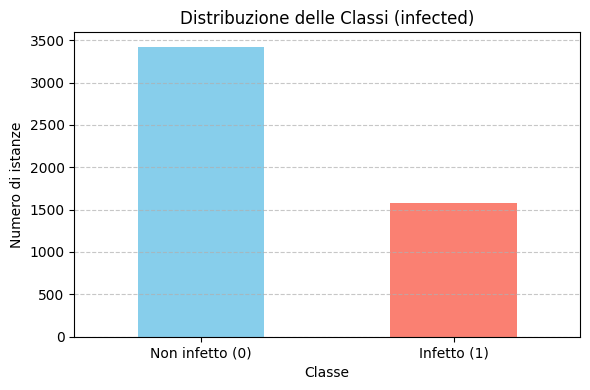

In [ ]:
import matplotlib.pyplot as plt

# create a grafic for the distribution of the class
plt.figure(figsize=(6, 4))
df['infected'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Distribuzione delle Classi (infected)')
plt.xlabel('Classe')
plt.ylabel('Numero di istanze')
plt.xticks(ticks=[0, 1], labels=['Non infetto (0)', 'Infetto (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Outliers detected using Z-Score:
      Feature  Index   Z-Score
0      karnof      5  3.170370
1        hemo     10  5.413227
2        cd80     10  3.157057
3        hemo     16  5.413227
4     symptom     16  3.359317
...       ...    ...       ...
1199  preanti   4983  3.558368
1200     hemo   4984  5.413227
1201     cd80   4989  3.193693
1202   oprior   4993  4.861126
1203   oprior   4997  4.861126

[1204 rows x 3 columns]


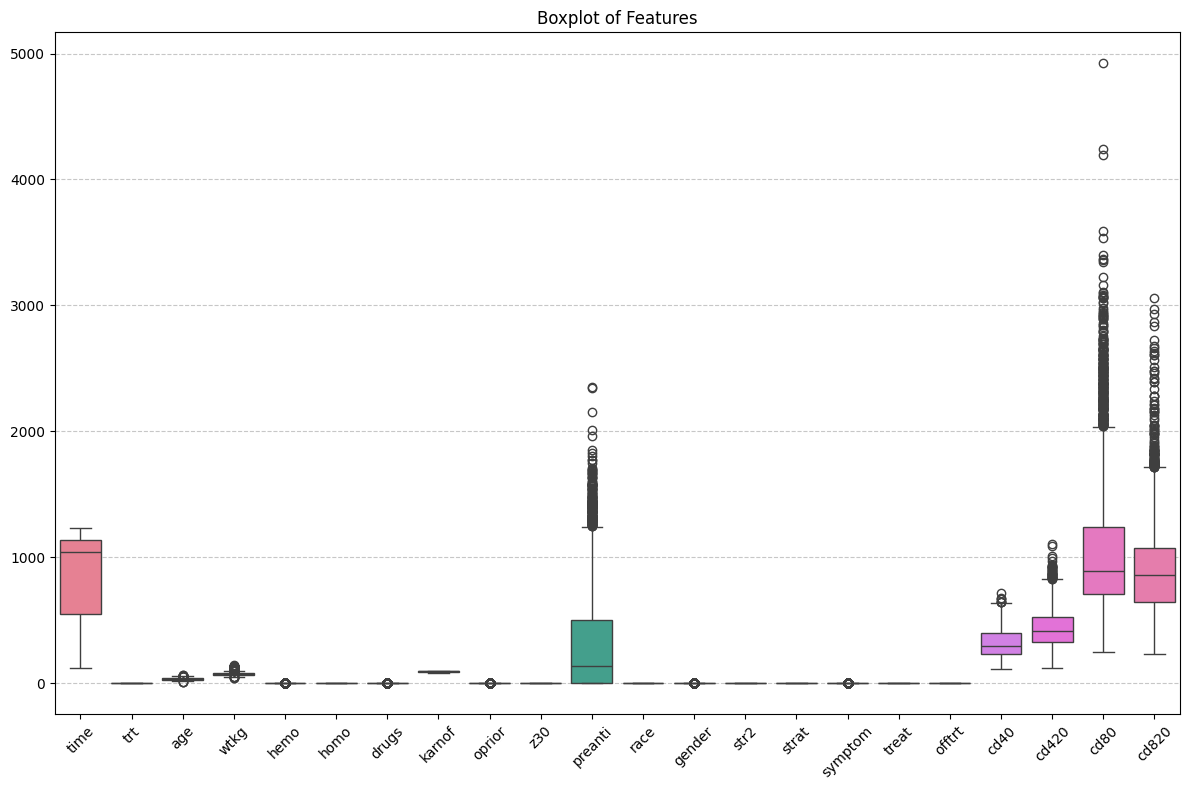

In [8]:
#outiler detection AS boxplot and zscore
#outlier detection with zscore
from scipy import stats
import seaborn as sns

# Calculate z-scores for each feature
z_scores = np.abs(stats.zscore(df.drop(columns=['infected'])))

# Set a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Create a DataFrame to store outlier information

outlier_df = pd.DataFrame({
    'Feature': df.drop(columns=['infected']).columns[outliers[1]],
    'Index': outliers[0],
    'Z-Score': z_scores[outliers]
})

# Display the outliers

print("Outliers detected using Z-Score:")
print(outlier_df)

# Create a boxplot for each feature to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['infected']))
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
